# Page Rank and HITS
### Till 02.03.2017

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.xkcd()
import networkx as nx
%matplotlib inline

During with lab we will check the change of results of Page Rank and HITS algorithms with respect to the values of $\alpha$ and number of iterations.

### Task 1.

a) Firstly let's make experiment for small network (Zachary or any other small one). Set any 3 distinct values for $\alpha$, fix the number of iterations, and run Page Rank. Plot results PR values wrt $\alpha$

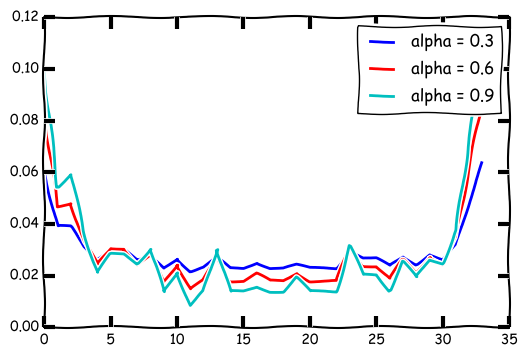

In [2]:
G = nx.karate_club_graph()
arr_alpha = [0.3, 0.6, 0.9] # 3 distinct values for alpha

for a in arr_alpha:
    pr = nx.pagerank(G, a)
    pr = pr.values()
    ind = nx.degree(G).keys()
    plt.plot(ind, pr, label ='alpha = %s'%a)
    plt.legend()

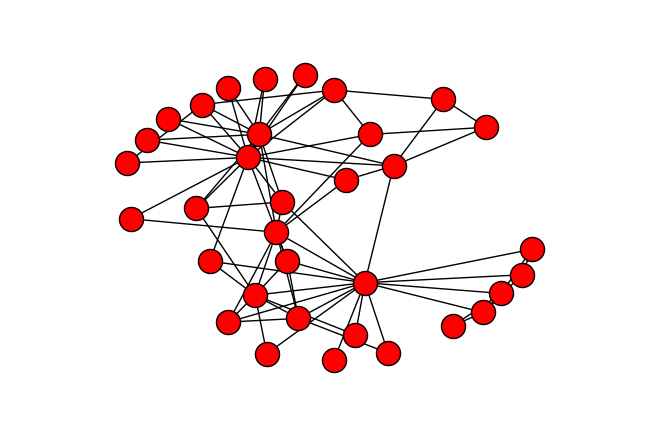

In [3]:
nx.draw(G)

b) Do the same for the number of iterations

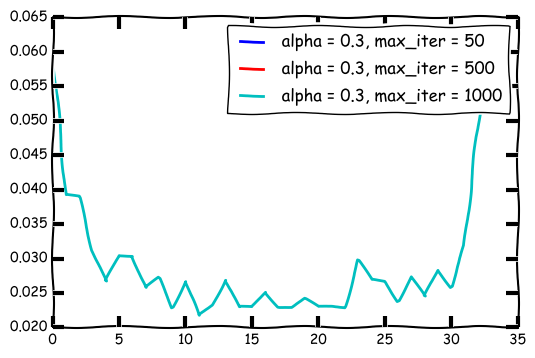

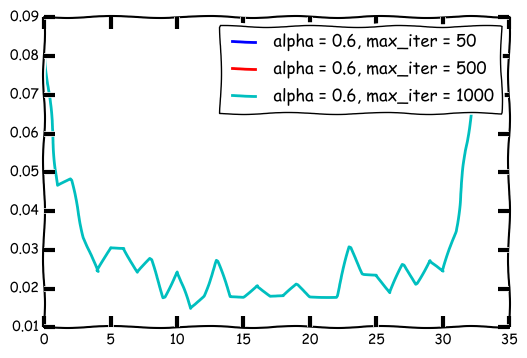

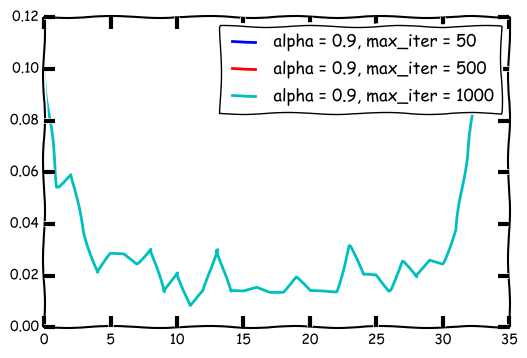

In [12]:
iters = [ 50, 500, 1000] # consider severeal values of the number of iterations
for a in arr_alpha:
    for it in iters:
        pr = nx.pagerank(G, a, max_iter = it)
        pr = pr.values()
        ind = nx.degree(G).keys()
        plt.plot(ind, pr, label ='alpha = %s, max_iter = %s'%(a,it))
        plt.legend()
    plt.figure()

# We can see that  graphs converge to one for different values of the number of iteration

c) Plot Page-Rank vs. Degree centrality

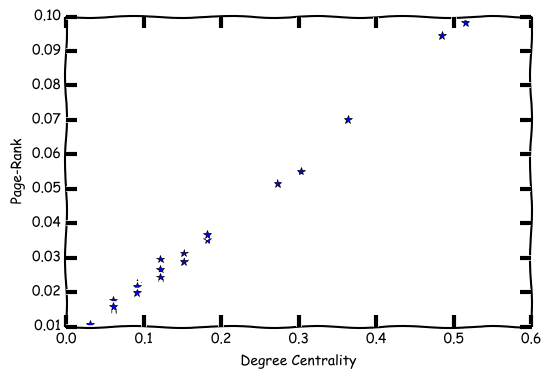

In [13]:
# Continue here
pr = nx.pagerank(G, alpha=0.8)
pr = pr.values()
d = nx.degree_centrality(G)
d = d.values()

plt.plot(d, pr, '*')
plt.xlabel('Degree Centrality')
plt.ylabel('Page-Rank')

### Task 2.

Let's switch to a bigger network. Download [political blogs](http://networkdata.ics.uci.edu/data/polblogs/polblogs.gml) network. Check its basic properties. Run HITS algorithm. Try to inverstigate the top nodes.

In [95]:
G = nx.read_gml(path = 'polblogs.gml') 

In [96]:
A = nx.adjacency_matrix(G)
P = nx.DiGraph(A) 

In [97]:
print "Number of verices is", P.number_of_nodes()
print "Number of edges is", P.number_of_edges()
print "Number of connected components is",nx.number_strongly_connected_components(P)

Number of verices is 1490
Number of edges is 19025
Number of connected components is 688


In [98]:
# Find the greatest connected component
CC = nx.strongly_connected_components(P)
CC_sort = sorted(CC, key = len, reverse=True)
SG = P.subgraph(CC_sort[0])
SG_num_of_nodes = SG.number_of_nodes()
print "Size of GCC is", SG_num_of_nodes

import random
import copy

gk = nx.degree(SG)
id_gk = np.array(gk.keys())

l =[]
N = 10000 # calculate shortest paths between 10000 random pairs of nodes
sl = 0
v =[]
for i in range(N):
    c1 = random.sample(set(id_gk), 1);
    c2 = copy.copy(c1)
    while c1 == c2:
        c2 = random.sample(set(id_gk),1);
    st = int(''.join(map(str,c1)))
    en = int(''.join(map(str,c2)))
    v.append(st)
    v.append(en)
    l.append(len(nx.shortest_path(SG,source=st,target=en)))
    sl+=len(nx.shortest_path(SG,source=st,target=en))
    
print "Average shortest path is", sl/N

Size of GCC is 793
Average shortest path is 4


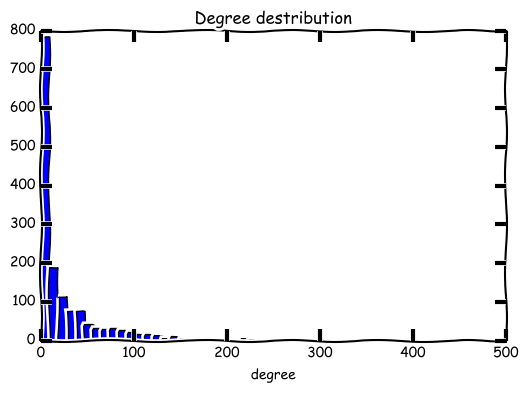

In [99]:
k = nx.degree(P)
id_sort = np.array(sorted(k, key = k.get, reverse=True))
k_sort = np.array(k.values())
k_sort = k_sort[id_sort-1]
fig, ax = plt.subplots()
plt.hist(k_sort,bins = 50)
plt.xlabel('degree')
plt.title('Degree destribution')

In [100]:
(h, a) = nx.hits(P)
a = a.values() # a-values 
h = h.values() # h-values 

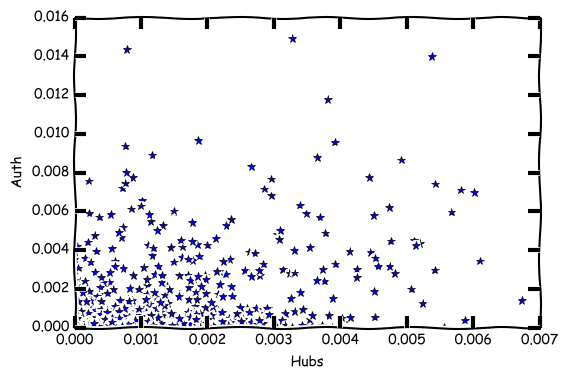

In [101]:
plt.plot(h,a, '*')
plt.xlabel('Hubs')
plt.ylabel('Auth')

In [102]:
idx = np.argsort(a)
idx[-1]

154

In [124]:
G.node[idx[-1]]

{'id': 154,
 'label': u'dailyhowler.com',
 'source': u'LeftyDirectory',
 'value': 0}

Vizualize top Authorities colored in blue with sizes proportional to A-value and their Common Hubs coloured in green with size proportional to H-value.

In [189]:
(h, a) = nx.hits(P)
n_top = 10
id_sort = np.array(sorted(a, key = a.get, reverse=True))
a_sort = np.array(a.values())
a_sort = a_sort[id_sort]
a_top = a_sort[:n_top] # values of top Authorities 
id_top = id_sort[:n_top] # IDs of top Authorities 

print "Top Authorities:"
for i in id_top:
    print G.node[i]  

Top Authorities:
{'source': u'LeftyDirectory', 'id': 154, 'value': 0, 'label': u'dailyhowler.com'}
{'source': u'LabeledManually', 'id': 640, 'value': 0, 'label': u'takebackthemedia.com'}
{'source': u'Blogarama,eTalkingHead', 'id': 54, 'value': 0, 'label': u'atomicairship.com'}
{'source': u'Blogarama', 'id': 728, 'value': 0, 'label': u'warriorsblog.blogspot.com'}
{'source': u'BlogPulse,LeftyDirectory', 'id': 641, 'value': 0, 'label': u'talkingpointsmemo.com'}
{'source': u'Blogarama', 'id': 1050, 'value': 1, 'label': u'inmyrightmind.com'}
{'source': u'eTalkingHead', 'id': 322, 'value': 0, 'label': u'jpandre.blogspot.com'}
{'source': u'Blogarama,LeftyDirectory', 'id': 755, 'value': 0, 'label': u'yarsrevenge.blogspot.com'}
{'source': u'CampaignLine', 'id': 492, 'value': 0, 'label': u'pacificviews.org'}
{'source': u'eTalkingHead', 'id': 179, 'value': 0, 'label': u'dewar.journalspace.com'}


In [190]:
print "a-values for Top Authorities: ", a_top 

a-values for Top Authorities:  [ 0.01493442  0.01436308  0.01398014  0.01176638  0.00966855  0.0095698
  0.00937086  0.00890682  0.00877736  0.00865573]


In [179]:
neibs = []
for i in range(n_top):
    # calculate incoming neighbors (hubs) for top Authorities
    neibs.append([P.in_edges(id_top[i])[j][0] for j in range(len(P.in_edges(id_top[i])))])

In [180]:
common_hubs = neibs[0]
for i in range(n_top-1): # find common hubs for top Authorities
    nexti = neibs[i+1]
    common_hubs = list(set(common_hubs).intersection(nexti))
print "Common Hubs :"
for i in common_hubs:
    print G.node[i]  

Common Hubs :
{'source': u'Blogarama', 'id': 668, 'value': 0, 'label': u'thepeach.blogspot.com'}
{'source': u'LeftyDirectory', 'id': 13, 'value': 0, 'label': u'agonist.org'}
{'source': u'BlogCatalog', 'id': 534, 'value': 0, 'label': u'proponentofreason.blogspot.com'}
{'source': u'Blogarama', 'id': 430, 'value': 0, 'label': u'mrstevebeers.blogspot.com'}


In [188]:
h_common = np.array(h.values())[common_hubs]
print "h-values for Common hubs: ", h_common 

h-values for Common hubs:  [ 0.00377632  0.00482158  0.00265847  0.00323621]


In [182]:
id_all = list(id_top)
vals = list(a_top)
colors = []
for i in range(len(a_top)):
    colors.append('b') # blue color for visualization of top  Authorities 
for i in common_hubs:
    id_all.append(i) # IDs top  Authorities + Common Hubs
    vals.append(h.values()[i]) # a-values for top  Authorities + h-values for Common Hubs
    colors.append('g') # green color for visualization of Common Hubs

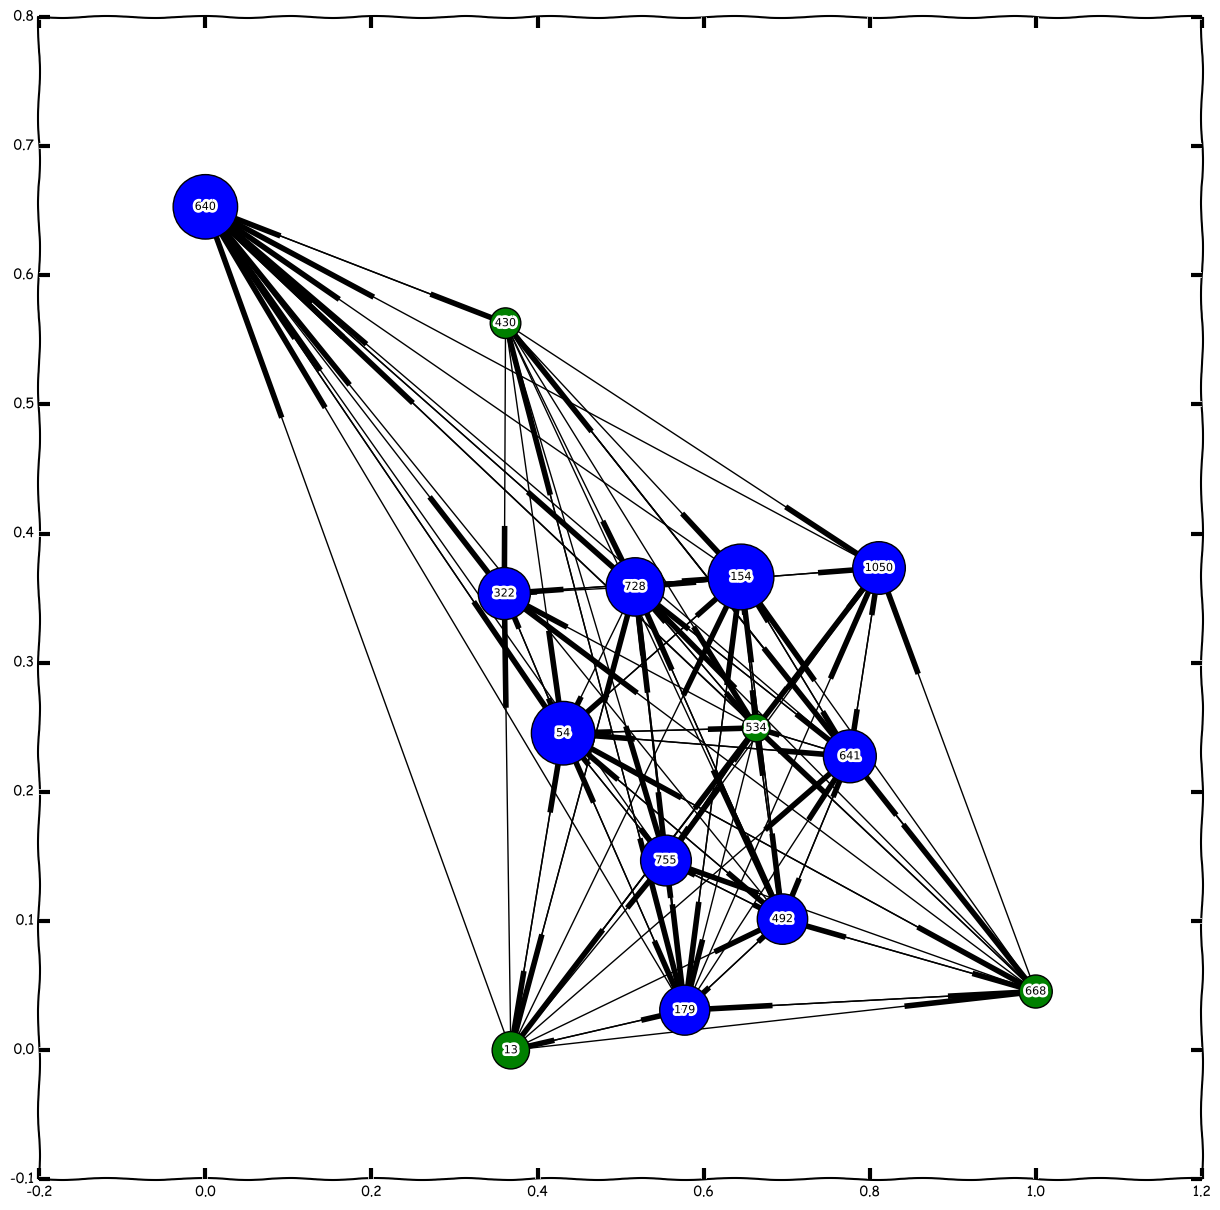

In [187]:
plt.figure(1, figsize=(15,15))
coord = nx.spring_layout(P.subgraph(id_all))
nx.draw_networkx(P.subgraph(id_all),
                 pos=coord,
                 nodelist= id_all,
                 node_size = [d*150000 for d in vals],
                 node_color = colors,
                 font_size=8,
                 cmap=plt.cm.Reds
                 )

For example, the Daily Howler (154) is an American political blog written by Bob Somerby that was perhaps the first major political blog (https://en.wikipedia.org/wiki/The_Daily_Howler). That is why this blog has the highest a-value, because it was often quoted.

Such sites as thepeach.blogspot.ru (668), agonist.org (13) has many links to the others, that is why these sites can be hubs.